In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch
import librosa
import librosa.display
import os,glob
from tqdm import tqdm_notebook
import re
import random
from random import randint
from sklearn.model_selection import train_test_split

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=5205019b05eb6e1c034f25357ef3661685d22926a47d401269883144eb022863
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
cd "/content/drive/My Drive/gender_detection/"

/content/drive/My Drive/gender_detection


In [ ]:
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests
count=0
#79,80
for i in tqdm_notebook(range(83,84), total=1, unit="epoch"):
  print(i)
  parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
  resp = requests.get("https://www.openslr.org/"+str(i)+"/")
  http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
  html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
  encoding = html_encoding or http_encoding
  soup = BeautifulSoup(resp.content, parser, from_encoding=encoding)
  
  for link in soup.find_all('a', href=True):
    l=link["href"].split(".")
    if l[len(l)-1]=="zip" or l[len(l)-1]=="tgz":
      if l[1]=="openslr":
        count=count+1
        name=l[len(l)-2].split("/")
        #print(link["href"],l[1],name[len(name)-1])
        file_url = link["href"]
        #print(file_url)
        !wget -c $file_url
        # r = requests.get(file_url, stream = True)  
          
        # with open("/content/drive/My Drive/gender_detection/"+name[len(name)-1]+"."+l[len(l)-1], "wb") as file:  
        #     for block in r.iter_content(chunk_size = 1024): 
        #         if block:  
        #             file.write(block)  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


83
--2020-10-31 14:30:49--  http://www.openslr.org/resources/83/irish_english_male.zip
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164531638 (157M) [application/zip]
Saving to: ‘irish_english_male.zip’

irish_english_male. 100%[===================>] 156.91M  18.2MB/s    in 9.2s    

2020-10-31 14:30:59 (17.1 MB/s) - ‘irish_english_male.zip’ saved [164531638/164531638]

--2020-10-31 14:30:59--  http://www.openslr.org/resources/83/midlands_english_female.zip
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103085118 (98M) [application/zip]
Saving to: ‘midlands_english_female.zip’

midlands_english_fe 100%[===================>]  98.31M  19.6MB/s    in 6.2s    

2020-10-31 14:31:05 (15.9 MB/s) - 

In [ ]:
cd /content/drive/My Drive/gender_detection/female/

/content/drive/My Drive/gender_detection/female


In [ ]:
for filename in glob.glob(os.path.join("/content/drive/My Drive/gender_detection/female/", '*.zip')):
  print(filename)
  
  l=filename.split("/")
  l_1=l[len(l)-1].split("_")
  t=l[len(l)-1]
  l_2=l_1[len(l_1)-1].split(".")
  print(l_2[0])
  
  !unzip $t -d "/content/drive/My Drive/gender_detection/female_unzipped/"

In [ ]:
min=100000
count=0
count1=0
g=[]
for filename in glob.glob(os.path.join("/content/drive/My Drive/gender_detection/male_unzipped/", '*.wav')):
  count1=count1+1
  #print(filename)
  l=filename.split("/")
  l_1=l[len(l)-1].split("_")
  t=l_1[0]
  #print(t)
  if t not in g:
    g.append(t)

  #print(count1)
print(g,count1)


['nom', 'wem', 'mim', 'som', 'irm', 'scm'] 10160


In [ ]:
!pip install soundfile

In [ ]:
print(g)

['ngm', 'vem', 'pem', 'com', 'clm', 'knm', 'gum', 'tem', 'tag', 'mlm', 'eum', 'cam', 'gam', 'arm']


In [ ]:
import soundfile as sf
ob = sf.SoundFile("/content/drive/My Drive/gender_detection/male_unzipped/clm_00610_00556859411.wav")
print(ob.samplerate)


48000


In [ ]:
for i in range(len(g)):
  g=['nom', 'wem', 'mim', 'som', 'irm', 'scm']
  data_speech=pd.DataFrame(columns=["S1","sr","Gender"])
  hop_length = 512
  n_mels =128
  n_fft = 2048
  #count=0
  for filename in glob.glob(os.path.join("/content/drive/My Drive/gender_detection/male_unzipped/", '*.wav')):
    l=filename.split("/")
    l_1=l[len(l)-1].split("_")
    t=l_1[0]
    if t == g[i]:
      y, sr = librosa.load(filename,sr=None)
      #print(librosa.load(filename,sr=None))
      # trim silent edges
      speech, _ = librosa.effects.trim(y)
      #speech=speech[:100000]
      if speech.shape[0]>100000:
        #print(speech.shape[0])
        speech=speech[:100000]
        #print(speech.shape[0])
        S1=librosa.feature.mfcc(y=speech,sr=sr)
        #print(S1)
        gender="male"
        # if gender == "f":
        #   gender="female"
        # if gender == "m":
        #   gender = "male"
        temp=[]
        temp1=[]
        temp2=[]
        temp.append(np.array(S1))
        temp1.append(gender)
        temp2.append(np.array(sr))
        #print(temp)
        df_temp=pd.DataFrame(SP is very convinclist(zip(temp,temp2,temp1)),columns=["S1","sr","Gender"])
        data_speech=data_speech.append(df_temp)
        print(data_speech.shape)


  data_speech.to_pickle("/content/drive/My Drive/gender_speech_male_"+str(16+i)+".pkl")

In [ ]:
cd /content/drive/My Drive/gender_detection/spanish

/content/drive/My Drive/gender_detection/spanish


In [ ]:
mkdir spanish

In [ ]:
for filename in glob.glob(os.path.join("/content/drive/My Drive/gender_detection/aida_tang_1/aidatatang_200zh/corpus/train", '*.tar.gz')):
  print(filename)
  
  l=filename.split("/")
  l_1=l[len(l)-1].split("_")
  t=l[len(l)-1]
  l_2=l_1[len(l_1)-1].split(".")
  print(t)
  
  !tar -xvzf $t -C "/content/drive/My Drive/gender_detection/aida_tang/"

In [ ]:
!tar -xvzf "/content/drive/My Drive/gender_detection/tedx_spanish_corpus.tgz" -C "/content/drive/My Drive/gender_detection/spanish/"

In [ ]:
for i in range(len(g)):  
  data_speech=pd.DataFrame(columns=["S1","sr","Gender"])
  hop_length = 512
  n_mels =128
  n_fft = 2048
  #count=0
  for filename in glob.glob(os.path.join("/content/drive/My Drive/gender_detection/female_1/", '*.wav')):
    l=filename.split("/")
    l_1=l[len(l)-1].split("_")
    t=l_1[0]
    if t == g[i]:
      y, sr = librosa.load(filename,sr=None)
      #print(librosa.load(filename,sr=None))
      # trim silent edges
      speech, _ = librosa.effects.trim(y)
      #speech=speech[:100000]
      if speech.shape[0]>100000:
        #print(speech.shape[0])
        speech=speech[:100000]
        #print(speech.shape[0])
        S1=librosa.feature.mfcc(y=speech,sr=sr)
        #print(S1)
        gender="female"
        # if gender == "f":
        #   gender="female"
        # if gender == "m":
        #   gender = "male"
        temp=[]
        temp1=[]
        temp2=[]
        temp.append(np.array(S1))
        temp1.append(gender)
        temp2.append(np.array(sr))
        #print(temp)
        df_temp=pd.DataFrame(list(zip(temp,temp2,temp1)),columns=["S1","sr","Gender"])
        data_speech=data_speech.append(df_temp)
        print(data_speech.shape)


  data_speech.to_pickle("/content/drive/My Drive/gender_speech_female_"+str(i+2)+".pkl")

In [ ]:
!ls

drive  sample_data


In [ ]:
df_1=pd.read_pickle("/content/drive/My Drive/gender_speech_male_1.pkl")

In [ ]:
df_1.head()

,S1,sr,Gender
0,"[[-589.0368806205586, -590.7716252810573, -593...",48000,male
0,"[[-745.5029158777608, -743.6093036397574, -746...",48000,male
0,"[[-559.6305392252254, -553.2311500801395, -546...",48000,male
0,"[[-522.9313127521281, -502.93893466367575, -51...",48000,male
0,"[[-698.6738918884931, -698.4536850934711, -699...",48000,male


In [ ]:
df_male=pd.DataFrame(columns=["S1","sr","Gender"])
for i in range(16,22):
  df_1=pd.read_pickle("/content/drive/My Drive/gender_speech_male_"+str(i)+".pkl")
  df_male=df_male.append(df_1)
# train_inputs, test_inputs, train_labels, test_labels = train_test_split(df_male["S1"], df_male["Gender"],random_state=2018, test_size=0.1)
# Scaler=StandardScaler()
# train_inputs=Scaler.fit_transform(train_inputs)
# test_inputs=Scaler.transform(test_inputs)
# data_male_train = {"S1": train_inputs, 
#         "Gender": train_labels} 
# df_male_train = pd.concat(data_male_train, 
#                axis = 1) 
# data_male_test = {"S1": test_inputs, 
#         "Gender": test_labels} 
# df_male_test = pd.concat(data_male_test, 
#                axis = 1) 

In [ ]:
df_female=pd.DataFrame(columns=["S1","sr","Gender"])
for i in range(19,24):
  df_1=pd.read_pickle("/content/drive/My Drive/gender_speech_female_"+str(i)+".pkl")
  df_female=df_female.append(df_1)
# train_inputs, test_inputs, train_labels, test_labels = train_test_split(df_female["S1"], df_female["Gender"],random_state=2018, test_size=0.1)
# Scaler=StandardScaler()
# train_inputs=Scaler.fit_transform(train_inputs)
# test_inputs=Scaler.transform(test_inputs)
# data_female_train = {"S1": train_inputs, 
#         "Gender": train_labels} 
# df_female_train = pd.concat(data_female_train, 
#                axis = 1) 
# data_female_test = {"S1": test_inputs, 
#         "Gender": test_labels} 
# df_female_test = pd.concat(data_female_test, 
#                axis = 1) 

In [ ]:
df=pd.DataFrame(columns=["S1","sr","Gender"])
df=df.append(df_male)
df=df.append(df_female)
df=df.sample(frac=1)

# df_test=pd.DataFrame(columns=["S1","Gender"])
# df_test=df_test.append(df_male_test)
# df_test=df_test.append(df_female_test)
# df_test=df_test.sample(frac=1)

In [ ]:
df.to_pickle("/content/drive/My Drive/gender_detection/gender_speech_english.pkl")

In [ ]:
df_0=pd.read_pickle("/content/drive/My Drive/gender_detection/gender_speech.pkl")
df_1=pd.read_pickle("/content/drive/My Drive/gender_detection/gender_speech_english.pkl")
df=df_0.append(df_1)

In [ ]:
df.shape

(95783, 3)

In [ ]:
test=df["Gender"]
train=df.drop("Gender",axis=1)
train=train.drop("sr",axis=1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(train,test,random_state=1,test_size=0.1)

In [ ]:
Y_1={"Gender":Y_train}
Y_1=pd.DataFrame(Y_1)
Y_2={"Gender":Y_test}
Y_2=pd.DataFrame(Y_2)

In [ ]:
X_train["Gender"]=Y_1["Gender"]
X_test["Gender"]=Y_2["Gender"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Scaler=StandardScaler()
# for i in range(X_train.shape[0]):
#   X_train["S1"].values[i]=Scaler.fit_transform(X_train["S1"].values[i])
# for i in range(X_test.shape[0]):
#   X_test["S1"].values[i]=Scaler.transform(X_test["S1"].values[i])

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def custom_dataloader(df,N):
  size=df.shape[0]
  final2=[]
  for j in range(int(size/N)):
    #print(j)
    data_points=[]
    data_labels=[]
    final=[]
    final1=[]
    for i in range(N):
      s=randint(0,df.shape[0]-1)
      input=df["S1"].values[s]
      labels=df["Gender"].values[s]
      if labels == "female":
        labels=0
      else:
        labels=1

      data_labels.append((input,labels))
    data_labels=tuple(data_labels)
    
    for points in data_labels:
      data,labels=points
      
      final.append(labels)
      data_points.append(data)
    
    final=torch.tensor(final)
    
    data_points=torch.tensor(data_points)
    data_points=data_points.float()
    data_points=data_points.reshape(N,data_points.shape[2],data_points.shape[1])
    final1.append(data_points)
    final1.append(final)
    final2.append(final1)
  
  return final2
    

In [ ]:
def init_weights(m):
  
  if type(m) == nn.Linear or type(m)== nn.Conv2d:
    nn.init.xavier_normal_(m.weight)
    #print(m.weight)
  

In [ ]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv1d(196, 32, 3),         
            nn.ReLU(),
            #nn.MaxPool2d(2, stride=2),  
            nn.Conv1d(32, 48, 3),        
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),   
            nn.Conv1d(24, 120, 3),         
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)  
        )
        self.fc_model = nn.Sequential(
            nn.Linear(180,64),        
            nn.ReLU(),
            nn.Linear(64,2),
            nn.ReLU()            
        )
        self.size=180
        self.alpha = nn.Parameter(torch.ones(self.size))
        self.bias = nn.Parameter(torch.zeros(self.size))
        self.eps=1e-9

       
        #nn.init.xavier_normal_(self.cnn_model.weight)
        #nn.init.xavier_normal_(self.fc_model.weight)
        
    def forward(self, x):
        
        x = self.cnn_model(x)
        #print("before fcc ",x)
        x = x.view(x.size(0), -1)
        x = self.alpha * (x - x.mean(dim=-1, keepdim=True))/(x.std(dim=-1, keepdim=True) + self.eps) + self.bias
        x = self.fc_model(x)
        #print("after fcc ",x)
        return x

In [ ]:
import torch.optim as optim
net = LeNet().to(device)
net.apply(init_weights)

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
# Keep only a single checkpoint, the best over test accuracy.
def save_checkpoint(state, is_best, filename='/content/drive/My Drive/gender_detection/checkpoint.pth.tar'):
    """Save checkpoint if a new best is achieved"""
    if is_best:
        print ("=> Saving a new best")
        torch.save(state, filename)  # save checkpoint
    else:
        print ("=> Training Loss did not improve")

In [ ]:
resume_weights = '/content/drive/My Drive/gender_detection/checkpoint.pth.tar'
import os.path
# If exists a best model, load its weights!
if os.path.isfile(resume_weights):
    #print("=> loading checkpoint '{}' ...".format(resume_weights))
    if device:
        checkpoint = torch.load(resume_weights)
    else:
        # Load GPU model on CPU
        checkpoint = torch.load(resume_weights,
                                map_location=lambda storage,
                                loc: storage)
    start_epoch = checkpoint['epoch']
    best_accuracy = checkpoint['best_accuracy']
    net.load_state_dict(checkpoint['state_dict'])
    print("=> loaded checkpoint '{}' (trained for {} epochs)",checkpoint['epoch'],best_accuracy,start_epoch)

=> loaded checkpoint '{}' (trained for {} epochs) 89 tensor([98.4060]) 89


In [ ]:
start_epoch=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch: 0/100
Training Loss:  0.04115878790616989
evaluation:  97.61954697986577
False
=> Training Loss did not improve
Epoch: 1/100
Training Loss:  0.01865069940686226
evaluation:  98.03901006711409
False
=> Training Loss did not improve
Epoch: 2/100
Training Loss:  0.030731962993741035
evaluation:  98.35360738255034
True
=> Saving a new best
Epoch: 3/100
Training Loss:  0.028396548703312874
evaluation:  97.93414429530202
False
=> Training Loss did not improve
Epoch: 4/100
Training Loss:  0.043771542608737946
evaluation:  97.89219798657719
False
=> Training Loss did not improve
Epoch: 5/100
Training Loss:  0.05485107749700546
evaluation:  98.32214765100672
False
=> Training Loss did not improve
Epoch: 6/100
Training Loss:  0.011260205879807472
evaluation:  97.80830536912751
False
=> Training Loss did not improve
Epoch: 7/100
Training Loss:  0.052923187613487244
evaluation:  97.94463087248322
False
=> Training Loss did not improve
Epoch: 8/100
Training Loss:  0.01767546497285366
evaluat

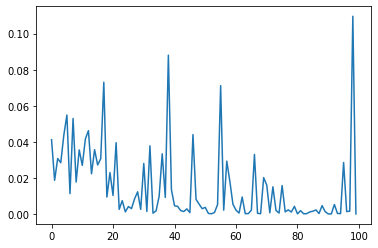

In [ ]:
import time
max_epochs = 100
best_accuracy=torch.FloatTensor([98.1942])
loss_arr=[]
loss_epoch_arr=[]
for epoch in tqdm_notebook(range(max_epochs),total=(max_epochs),unit="epoch"):
  net.train()
  train_dataloader = custom_dataloader(X_train,128)
  for i, data in enumerate(train_dataloader, 0):
    t0=time.time()
    inputs, labels = data
    #print(inputs.shape)
    inputs, labels = inputs.to(device), labels.to(device)
    #print(inputs)
    #inputs=inputs
    opt.zero_grad()

    outputs = net(inputs)
    #print(outputs)
    loss = loss_fn(outputs, labels)
    loss.backward(retain_graph=True)
    torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)
    loss_arr.append(loss.item())
    #loss.backward()
    opt.step()
    t1=time.time()
    #print("time",t1-t0)
  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d' % (epoch, max_epochs))
  print("Training Loss: ",loss.item())
  test_dataloader=custom_dataloader(X_test,64)
  acc=evaluation(test_dataloader)
  print("evaluation: ",acc)
  acc=torch.FloatTensor([acc])
  is_best=bool(acc.numpy() > best_accuracy.numpy())
  print(is_best)
  best_accuracy=torch.FloatTensor(max(acc.numpy(),best_accuracy.numpy()))
  save_checkpoint({
      'epoch':start_epoch+epoch+1,
      'state_dict':net.state_dict(),
      'best_accuracy':best_accuracy
  },is_best)
plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
def evaluation(dataloader):
    net.eval()
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        #print(outputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        #print(pred,labels)
        correct += (pred == labels).sum().item()
    #print(correct,total)
    #return 100 * correct / total
    return pred,labels,100 * correct / total

In [ ]:
a=evaluation(custom_dataloader(X_test,X_test.shape[0]))
label=a[1]
pred=a[0]
label=label.detach()
pred=pred.detach()
label=label.cpu()
pred=pred.cpu()
label=label.numpy()
pred=pred.numpy()
print(label,pred,a[2])

[1 0 1 ... 0 1 0] [1 0 1 ... 0 1 0] 98.1835264641403


In [ ]:
B=confusion(pred,label)
print("confusion_matrix")
print(B)

precision=B[1,1]/(B[1,1]+B[0,1])
print("precision",precision)
recall=B[1,1]/(B[1,1]+B[1,0])
print("recall",recall)
f1=2*precision*recall/(precision+recall)
print("f1",f1)

9579 9579
confusion_matrix
[[4830.  109.]
 [  65. 4575.]]
precision 0.976729291204099
recall 0.9859913793103449
f1 0.9813384813384813


In [ ]:
for i in range(len(evaluation(custom_dataloader(X_test,X_test.shape[0]))[0])):
  print()

In [ ]:
def confusion(y_pred,y):
  true_positive=0
  true_negative=0
  false_positive=0
  false_negative=0
  print(len(y),len(y_pred))
  for i in range(len(y)):
    if y[i]==y_pred[i] and y[i]==1:
      true_positive+=1
    if y[i]==1 and y_pred[i]==0:
      false_negative+=1
    if y[i]==0 and y_pred[i]==1:
      false_positive+=1
    if y[i]==y_pred[i] and y[i]==0:
      true_negative+=1

  A=np.random.randn(2,2)
  A[1,1]=true_positive
  A[0,0]=true_negative
  A[1,0]=false_positive
  A[0,1]=false_negative
  return A

In [ ]:
!pip install ffmpeg-python

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg
AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""
def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

audio, sr = get_audio()
import scipy
scipy.io.wavfile.write('recording.wav', sr, audio)
y, sr = librosa.load("/content/recording.wav",sr=None)
speech, _ = librosa.effects.trim(y)

speech=speech[:100000]
S1=librosa.feature.mfcc(y=speech,sr=sr)
S1=torch.tensor(S1)
S1=S1.float()
S1=S1.reshape(1,S1.shape[1],S1.shape[0])
S1=S1.to(device)
out=net(S1)
print(out)

tensor([[0.0000, 1.7261]], device='cuda:0', grad_fn=<ReluBackward0>)
